<a href="https://colab.research.google.com/github/Jenny000327/ML_study/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터 전처리

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = sns.load_dataset('titanic')

In [5]:
df.head() #상위 5개 데이터 확인인

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [13]:
# train 데이터 : 처음부터 800번까지
# 테스트 데이터 : 나머지
train_df = df[:800]
test_df = df[800:]

In [14]:
print(len(train_df))
print(len(test_df))

800
91


### pclass와 survived

In [16]:
#pclass와 survived 의 관계  각 그룹별 생존 확률
train_df[['pclass','survived']].groupby(['pclass'], as_index = False).mean().sort_values(by = 'survived', ascending = False)
#train데이터 중에 'pclass,survived열만 뽑는다. pclass 기준으로 그룹화한다. survived에 각 그룹마다 평균을 계산한다. survived기준 내림차순으로 정렬한다

,pclass,survived
0,1,0.615385
1,2,0.481928
2,3,0.246014


In [17]:
#다른 코드드
train_df.groupby('pclass')['survived'].mean().sort_values(ascending=False).reset_index()

,pclass,survived
0,1,0.615385
1,2,0.481928
2,3,0.246014


### parch와 survived

In [18]:
#parch와 survived의 관계
#parch => parents and children , parch 값이 높을 수록 가족 구성원이 많음
train_df[["parch","survived"]].groupby(['parch'],as_index = False).mean().sort_values(by = 'survived',ascending = False)


,parch,survived
2,2,0.527778
1,1,0.514851
3,3,0.500000
0,0,0.350163
5,5,0.250000
4,4,0.000000
6,6,0.000000


In [20]:
train_df.groupby('parch')['survived'].mean().sort_values(ascending = False).reset_index()

,parch,survived
0,2,0.527778
1,1,0.514851
2,3,0.500000
3,0,0.350163
4,5,0.250000
5,4,0.000000
6,6,0.000000


### sibsp와 survived

In [23]:
#sibsp 형제자매와 배우자의 수
train_df[["sibsp","survived"]].groupby(['sibsp'],as_index = False).mean().sort_values(by = 'survived', ascending = False)


,sibsp,survived
1,1,0.518325
2,2,0.481481
0,0,0.348708
3,3,0.266667
4,4,0.200000
5,5,0.000000
6,8,0.000000


In [24]:
train_df.groupby('sibsp')['survived'].mean().sort_values(ascending = False).reset_index()

,sibsp,survived
0,1,0.518325
1,2,0.481481
2,0,0.348708
3,3,0.266667
4,4,0.200000
5,5,0.000000
6,8,0.000000


### age와 survived 관계계

<Axes: xlabel='age', ylabel='Count'>

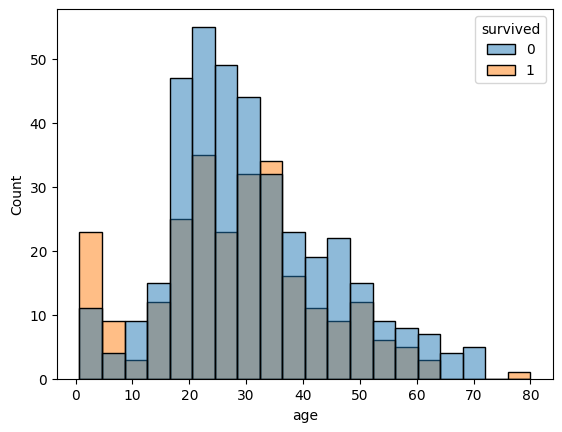

In [25]:
sns.histplot(data = train_df, x = 'age', bins = 20, hue = 'survived') # x축 age, 막대갯수 : 20개, 살아 남은 사람 막대 색깔 다르게게

# hue : seaborn 라이브러리에서 열의 이름을 지정하는 매개변수. 같은 플롯 내에서 데이터를 쉽게 구분하여 시각적으로 나타낼 수 있다. 
#플롯 : 데이터 시각화를 위해 사용되는 그래프의 일종. 데이터의 패턴과 관계를 파악하는데 매우 유용 
#플롯 종류 : 히스토그램, 산점도, 선그래프 등등

<Axes: xlabel='age', ylabel='Count'>

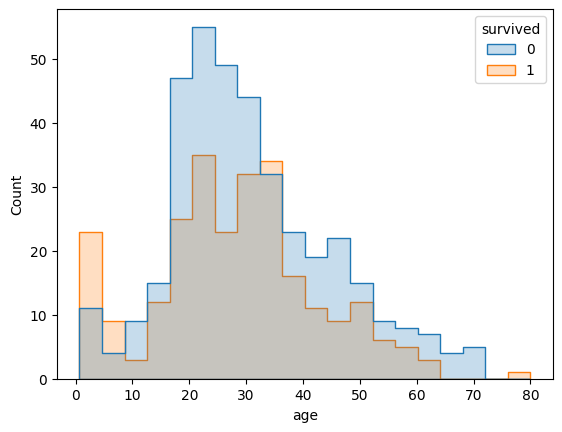

In [29]:
sns.histplot(data=train_df, x='age', bins=20, hue='survived', element='step')
#element = step 막대를 단계별로 표시, 막대의 높이가 아닌 막대의 간격이 의미를 가지도록 하는 방법
#모든 막대의 크기가 동일해져 시각적으로 데이터를 비교할 때 더욱 편리하게 만들 수 있다.

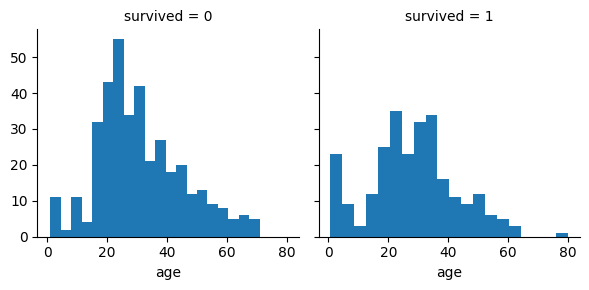

In [31]:
a =sns.FacetGrid(train_df, col = 'survived') #survived 값을 구분 기준으로 사용하는 FacetGrid 생성성
a.map(plt.hist, 'age', bins = 20)


### 각 pclass에서 age마다 survived 가능성성

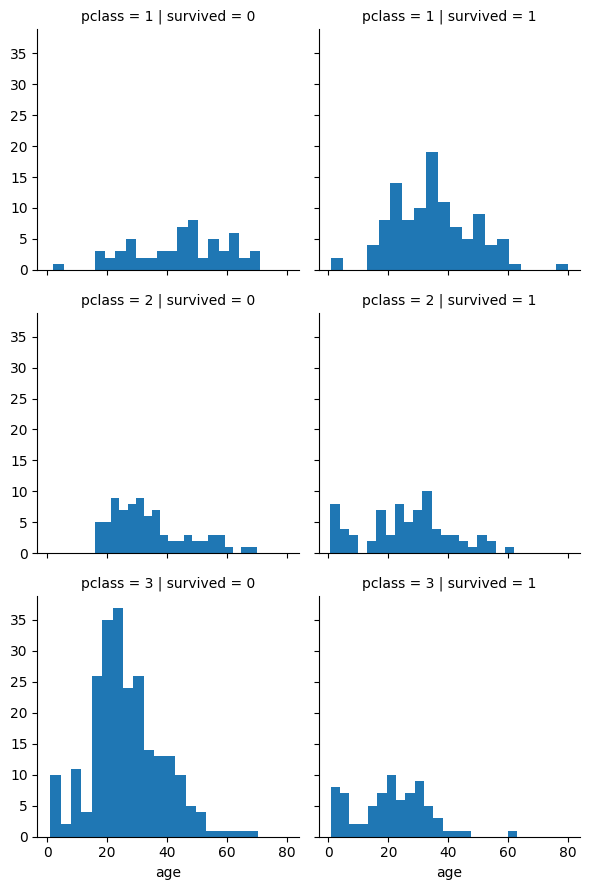

In [32]:
a = sns.FacetGrid(train_df, col = 'survived', row = 'pclass')
a.map(plt.hist, 'age', bins = 20)

### 필요 없는 필드 삭제제

In [35]:
col_names = train_df.columns #col_names라는 변수 만들어서 그룹 지어서 한번에 삭제해버리기기
print(col_names)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [36]:
train_df = train_df.drop(col_names[4:], axis = 1) #sibsp부터 다 삭제제

In [37]:
train_df.head()

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [38]:
test_df = test_df.drop(col_names[4:], axis = 1)

In [39]:
test_df.head()

,survived,pclass,sex,age
800,0,2,male,34.00
801,1,2,female,31.00
802,1,1,male,11.00
803,1,3,male,0.42
804,1,3,male,27.00


### 결측값

In [40]:
print(train_df.isnull().sum())

survived      0
pclass        0
sex           0
age         163
dtype: int64


In [41]:
print(test_df.isnull().sum())

survived     0
pclass       0
sex          0
age         14
dtype: int64


### age 평균으로 결측값 채우기

In [42]:
#나이 결측치를 객실 등급의 평균 나이로 
train_df["age"] = train_df.groupby(['pclass']).age.transform(lambda x: x.fillna(x.mean()))
test_df["age"] = test_df.groupby(['pclass']).age.transform(lambda x: x.fillna(x.mean()))

In [ ]:
#위의 코드와 같은 기능
train_df['age'] = train_df.groupby('pclass')['age'].apply(lambda x: x.fillna(x.mean()))
test_df['age'] = test_df.groupby('pclass')['age'].apply(lambda x: x.fillna(x.mean()))

lambda :  Python에서 함수를 정의하는 방법 중 하나로, 한 줄로 간단하게 함수를 작성할 수 있도록 해준다.
 
 "lambda" 함수는 이름이 없는 익명 함수이며, 일반적으로 다른 함수의 인자로 전달되거나, 함수 내부에서 간단한 연산을 수행할 때 사용된된다.



---


transform : Pandas 라이브러리에서 사용되는 함수 중 하나로, 그룹화된 데이터의 각 요소를 다른 값으로 변환한다. 

"transform" 함수는 그룹화된 데이터의 각 요소에 대해 작업을 수행하며, 원래의 데이터프레임의 크기와 모양을 유지한 채 작업 결과를 반환한다.

++ apply 함수 : 판다스에서 데이터프레임이나 시리즈의 각 열에 apply 함수를 적용하여 각 열의 합계를 계산.

In [55]:
import pandas as pd

data = {'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]}
df = pd.DataFrame(data)

# 각 열의 합계를 계산
result = df.apply(sum)
print(result)


A     6
B    15
C    24
dtype: int64


In [44]:
print(train_df.isnull().sum())

survived    0
pclass      0
sex         0
age         0
dtype: int64


In [45]:
print(test_df.isnull().sum())

survived    0
pclass      0
sex         0
age         0
dtype: int64


### 성별 인코딩 하기기

인코딩이란? 

인코딩(Encoding)은 데이터를 컴퓨터에서 처리하기 위해 문자나 기호 등을 숫자 형태로 변환하는 과정

컴퓨터는 0과 1로 이루어진 이진수(Binary) 형태의 데이터만 처리할 수 있기 때문에, 문자나 기호 등을 이진수로 변환하여 저장하고 처리해야 한다. 이를 위해 다양한 인코딩 방식이 개발되어 있으며, 대표적으로 ASCII, EUC-KR, UTF-8 등이 있다.

예를 들어, 영문으로 작성된 문서를 처리할 경우, ASCII 인코딩을 사용하여 각 문자를 7비트로 표현할 수 있다. 한글을 처리할 경우에는 EUC-KR 인코딩이나 UTF-8 인코딩을 사용하여 한글 문자를 다양한 방식으로 표현할 수 있다.

따라서, 인코딩은 데이터를 다루는 과정에서 매우 중요한 역할을 한다. 적절한 인코딩 방식을 선택하지 않으면 데이터가 깨지거나 처리가 불가능한 상황이 발생할 수 있다.

In [47]:
map_dict = {'female' : 0, 'male' : 1}

train_df['sex'] = train_df['sex'].map(map_dict).astype(int) #정수형으로 변환 
test_df['sex'] = test_df['sex'].map(map_dict).astype(int)

In [56]:
# 다른 방법 replace 함수 이용
train_df['sex'] = train_df['sex'].replace({'female': 0, 'male': 1})
test_df['sex'] = test_df['sex'].replace({'female': 0, 'male': 1})


In [48]:
train_df.head()

,survived,pclass,sex,age
0,0,3,1,22.0
1,1,1,0,38.0
2,1,3,0,26.0
3,1,1,0,35.0
4,0,3,1,35.0


### 나이 분류류

In [49]:
def age_func(x):
    if x < 20:
        return 1
    elif x < 40:
        return 2
    elif x < 60:
        return 3
    else:
        return 4

In [50]:
train_df['age'] = train_df['age'].apply(age_func)

In [52]:
test_df['age'] = test_df['age'].apply(age_func)

In [53]:
train_df.head()

,survived,pclass,sex,age
0,0,3,1,2
1,1,1,0,2
2,1,3,0,2
3,1,1,0,2
4,0,3,1,2
